## Prova per a eliminar outliers automàticament

In [77]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('Financial Distress.csv')
name = dataset.columns[18]
data = dataset.values[:,18]

#### Interquartile Range Method

<IPython.core.display.Javascript object>


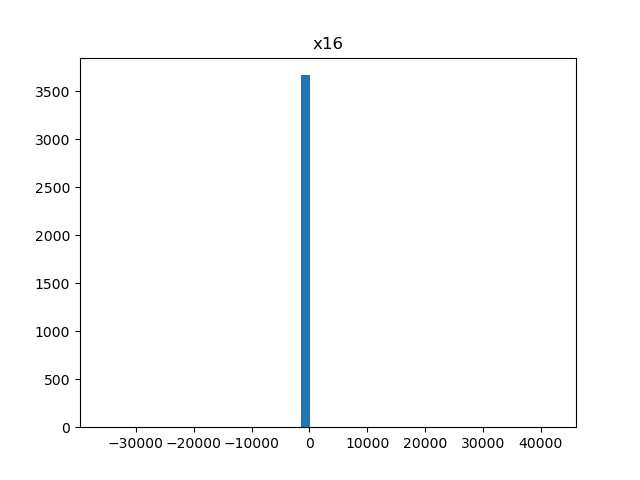

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.665e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-35758.  , -34199.24, -32640.48, -31081.72, -29522.96, -27964.2 ,
        -26405.44, -24846.68, -23287.92, -21729.16, -20170.4 , -18611.64,
        -17052.88, -15494.12, -13935.36, -12376.6 , -10817.84,  -9259.08,
         -7700.32,  -6141.56,  -4582.8 ,  -3024.04,  -1465.28,     93.48,
          1652.24,   3211.  ,   4769.76,   6328.52,   7887.28,   9446.04,
      

In [78]:
# Generar gràfica abans de eliminar outliers
plt.figure()

plt.title(name)
plt.hist(data, bins=50)

In [79]:
# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

Percentiles: 25th=0.089, 75th=0.300, IQR=0.212


In [80]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 159


In [81]:
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 3513


<IPython.core.display.Javascript object>


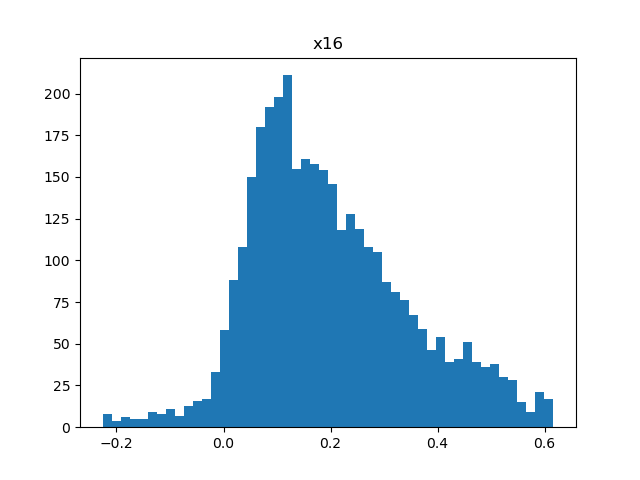

(array([  8.,   4.,   6.,   5.,   5.,   9.,   8.,  11.,   7.,  13.,  16.,
         17.,  33.,  58.,  88., 108., 150., 180., 192., 198., 211., 155.,
        161., 158., 154., 146., 118., 128., 119., 108., 105.,  87.,  81.,
         76.,  67.,  59.,  46.,  54.,  39.,  41.,  51.,  39.,  36.,  38.,
         30.,  28.,  15.,   9.,  21.,  17.]),
 array([-0.22602  , -0.2091708, -0.1923216, -0.1754724, -0.1586232,
        -0.141774 , -0.1249248, -0.1080756, -0.0912264, -0.0743772,
        -0.057528 , -0.0406788, -0.0238296, -0.0069804,  0.0098688,
         0.026718 ,  0.0435672,  0.0604164,  0.0772656,  0.0941148,
         0.110964 ,  0.1278132,  0.1446624,  0.1615116,  0.1783608,
         0.19521  ,  0.2120592,  0.2289084,  0.2457576,  0.2626068,
         0.279456 ,  0.2963052,  0.3131544,  0.3300036,  0.3468528,
         0.363702 ,  0.3805512,  0.3974004,  0.4142496,  0.4310988,
         0.447948 ,  0.4647972,  0.4816464,  0.4984956,  0.5153448,
         0.532194 ,  0.5490432,  0.5658924,  0

In [82]:
# Generar gràfica despres de eliminar outliers
plt.figure()

plt.title(name)
plt.hist(outliers_removed, bins=50)

<IPython.core.display.Javascript object>


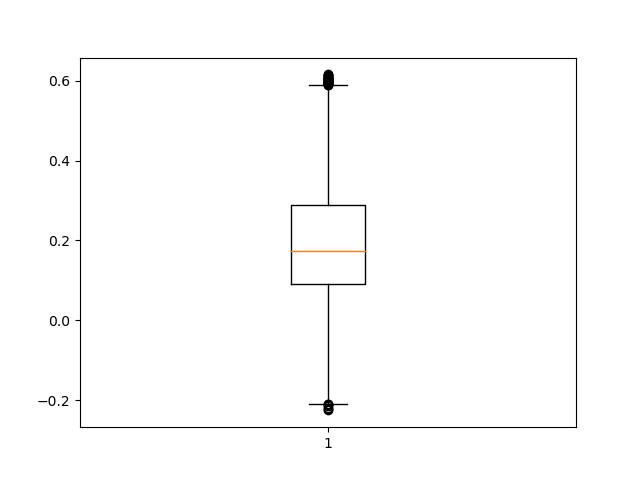

{'whiskers': [<matplotlib.lines.Line2D at 0x233ad73da60>,
 'caps': [<matplotlib.lines.Line2D at 0x233ad745040>,
 'boxes': [<matplotlib.lines.Line2D at 0x233ad71f4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x233ad7454c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x233ad745790>],
 'means': []}

In [83]:
plt.figure()

plt.boxplot(outliers_removed)

#### Test automatic per a identificar Gaussianes

In [129]:
import random
sample = random.choices(outliers_removed, k=100)

In [130]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=2.863, p=0.239
Sample looks Gaussian (fail to reject H0)


<IPython.core.display.Javascript object>


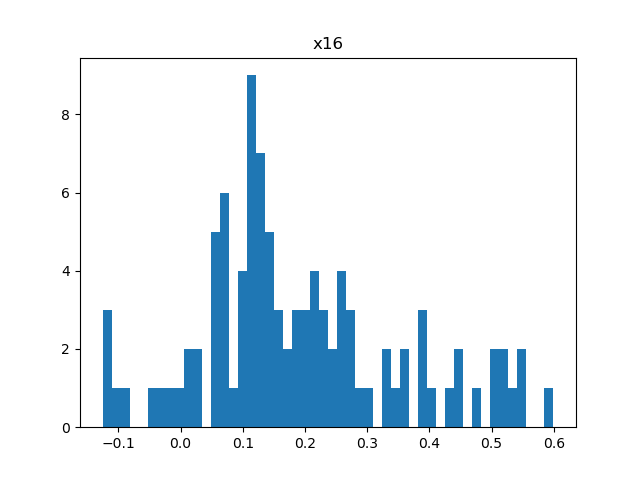

(array([3., 1., 1., 0., 0., 1., 1., 1., 1., 2., 2., 0., 5., 6., 1., 4., 9.,
        7., 5., 3., 2., 3., 3., 4., 3., 2., 4., 3., 1., 1., 0., 2., 1., 2.,
        0., 3., 1., 0., 1., 2., 0., 1., 0., 2., 2., 1., 2., 0., 0., 1.]),
 array([-0.1254   , -0.1109006, -0.0964012, -0.0819018, -0.0674024,
        -0.052903 , -0.0384036, -0.0239042, -0.0094048,  0.0050946,
         0.019594 ,  0.0340934,  0.0485928,  0.0630922,  0.0775916,
         0.092091 ,  0.1065904,  0.1210898,  0.1355892,  0.1500886,
         0.164588 ,  0.1790874,  0.1935868,  0.2080862,  0.2225856,
         0.237085 ,  0.2515844,  0.2660838,  0.2805832,  0.2950826,
         0.309582 ,  0.3240814,  0.3385808,  0.3530802,  0.3675796,
         0.382079 ,  0.3965784,  0.4110778,  0.4255772,  0.4400766,
         0.454576 ,  0.4690754,  0.4835748,  0.4980742,  0.5125736,
         0.527073 ,  0.5415724,  0.5560718,  0.5705712,  0.5850706,
         0.59957  ]),
 <BarContainer object of 50 artists>)

In [125]:
# Generar gràfica despres de eliminar outliers
plt.figure()

plt.title(name)
plt.hist(sample, bins=50)

#### Repetir el proces per a tots els atributs

In [151]:
for i in range(0, len(dataset.columns)):
    name = dataset.columns[i]
    data = dataset.values[:,i]
    print ("-----")
    print(name)
    # calculate interquartile range
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    
    
    seed(1)
    # normality test
    times = 0

    for _ in range(0,10):  # Realitzar el test 10 vegades
        sample = random.choices(outliers_removed, k=100)
        stat, p = normaltest(sample)
        #print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            #print('Sample looks Gaussian (fail to reject H0)')
            times = times + 1
        #else:
            #print('Sample does not look Gaussian (reject H0)')
            
    print("El test ha donat positiu ", times, "vegades.")
    if times >= 7:
        print("Sembla una distribució gaussiana")

-----
Company
Percentiles: 25th=80.000, 75th=264.250, IQR=184.250
Identified outliers: 0
Non-outlier observations: 3672
El test ha donat positiu  1 vegades.
-----
Time
Percentiles: 25th=4.000, 75th=11.000, IQR=7.000
Identified outliers: 0
Non-outlier observations: 3672
El test ha donat positiu  0 vegades.
-----
Financial Distress
Percentiles: 25th=0.172, 75th=1.352, IQR=1.179
Identified outliers: 312
Non-outlier observations: 3360
El test ha donat positiu  1 vegades.
-----
x1
Percentiles: 25th=0.952, 75th=1.506, IQR=0.554
Identified outliers: 258
Non-outlier observations: 3414
El test ha donat positiu  8 vegades.
Sembla una distribució gaussiana
-----
x2
Percentiles: 25th=0.049, 75th=0.189, IQR=0.140
Identified outliers: 120
Non-outlier observations: 3552
El test ha donat positiu  8 vegades.
Sembla una distribució gaussiana
-----
x3
Percentiles: 25th=0.502, 75th=0.749, IQR=0.248
Identified outliers: 21
Non-outlier observations: 3651
El test ha donat positiu  8 vegades.
Sembla una distr

Percentiles: 25th=11.845, 75th=13.803, IQR=1.959
Identified outliers: 143
Non-outlier observations: 3529
El test ha donat positiu  9 vegades.
Sembla una distribució gaussiana
-----
x52
Percentiles: 25th=0.113, 75th=0.346, IQR=0.233
Identified outliers: 141
Non-outlier observations: 3531
El test ha donat positiu  5 vegades.
-----
x53
Percentiles: 25th=0.117, 75th=0.283, IQR=0.167
Identified outliers: 77
Non-outlier observations: 3595
El test ha donat positiu  7 vegades.
Sembla una distribució gaussiana
-----
x54
Percentiles: 25th=443.702, 75th=2176.000, IQR=1732.298
Identified outliers: 374
Non-outlier observations: 3298
El test ha donat positiu  0 vegades.
-----
x55
Percentiles: 25th=-0.154, 75th=0.219, IQR=0.373
Identified outliers: 430
Non-outlier observations: 3242
El test ha donat positiu  9 vegades.
Sembla una distribució gaussiana
-----
x56
Percentiles: 25th=0.135, 75th=0.320, IQR=0.185
Identified outliers: 64
Non-outlier observations: 3608
El test ha donat positiu  9 vegades.
Se